In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.dates as mdates
import os
import glob
import seaborn as sns
import datetime as dt
import statsmodels.formula.api as smf

In [2]:
bike_data = pd.concat(map(pd.read_csv, glob.glob(os.path.join('', "Datasets/bike_data*.csv"))))
daily_covid_data = pd.read_csv("Datasets/daily_covid_scotland.csv")

In [3]:
#basic cleaning
(bike_data.isna().sum()) 
bike_data['started_at'] = pd.to_datetime(bike_data['started_at']).dt.tz_localize(None) #convert to dateTime
bike_data['ended_at'] = pd.to_datetime(bike_data['ended_at']).dt.tz_localize(None)
bike_data = bike_data.drop(['start_station_description','end_station_description'], axis=1) #not needed
bike_data = bike_data[((bike_data.duration >= 150) & (bike_data.duration <= 7200))] #filter times

In [4]:
#bike usage
days = bike_data['started_at']


prelockdown = days[(days > '2020-01-01') & (days < '2020-03-23')]
prelockdown = (prelockdown.groupby(prelockdown.dt.week).count())
duringlockdown = days[(days > '2020-03-01') & (days < '2020-06-01')]
duringlockdown = (duringlockdown.groupby(duringlockdown.dt.week).count())
prelockdown2019 = days[(days > '2019-01-01') & (days < '2019-03-23')]
prelockdown2019 = (prelockdown2019.groupby(prelockdown2019.dt.week).count())
duringlockdown2019 = days[(days > '2019-03-01') & (days < '2019-06-01')]
duringlockdown2019 = (duringlockdown2019.groupby(duringlockdown2019.dt.week).count())

print(prelockdown2019.mean())
print(prelockdown2019)
actuallockdown = prelockdown/prelockdown2019
actualpre = duringlockdown/duringlockdown2019


nineteen = days[(days > '2019-01-01') & (days < '2019-12-31')]
nineteen = (nineteen.groupby(nineteen.dt.week).count())
twenty = days[(days > '2020-01-01') & (days < '2020-12-31')]
twenty = (twenty.groupby(twenty.dt.week).count())

print(stats.ttest_ind(actuallockdown, actualpre))


#I wanted to compare the effect of lockdown on the usage on bikes, but the weather also plays a factor in the usage, so i got
#data from the previous year, used it to normalise with 2020 to get rid of the weather factor. This way we compare the 
#immediate effect of the lockdown not affected by any other exterior factors giving us a p-value of 0.97 which clearly indicates
#no difference in the usage of bikes before and during lockdown




#Our null hypothesis is that there is no change in bike usage prelockdown and during lockdown, the p value is so large which
#indicates that our null hypothesis is correct and is not rejected


1078.75
started_at
1      894
2      993
3     1236
4     1026
5      674
6      786
7     1144
8     1107
9     1300
10     997
11    1339
12    1449
Name: started_at, dtype: int64
Ttest_indResult(statistic=0.03710783724387137, pvalue=0.9707059580705653)


In [5]:
#winter and summer
days = bike_data['started_at']
winter = days[(days > '2019-12-01') & (days < '2020-02-01')]
winter = (winter.groupby(winter.dt.week).count())
summer = days[(days > '2019-06-01') & (days < '2019-09-01')]
summer = (summer.groupby(summer.dt.week).count())
print(winter.mean())
print(summer.mean())


1653.2
2766.285714285714


In [6]:
#popular stations test pre and post lockdown, inner and outer city

#days = bike_data['started_at']


#prelockdown = days[(days > '2020-01-01') & (days < '2020-03-23')]
#prelockdown = (prelockdown.groupby(prelockdown.dt.hour).count())
#duringlockdown = days[(days > '2020-03-01') & (days < '2020-06-01')]
#duringlockdown = (duringlockdown.groupby(duringlockdown.dt.hour).count())




def haversine_vectorize(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    newlon = lon2 - lon1
    newlat = lat2 - lat1
    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2
    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

distance = bike_data
distance['haversine_dist_start'] = haversine_vectorize(55.94410409593906, -3.189223922703719, distance['start_station_latitude'], distance['start_station_longitude'])
distance['haversine_dist_end'] = haversine_vectorize(55.94410409593906, -3.189223922703719, distance['end_station_latitude'], distance['end_station_longitude'])

citycentre = distance[(distance['haversine_dist_start'] < 2.5) & (distance['haversine_dist_end']<2.5 )]
cityside = distance[(distance['haversine_dist_start'] > 2.5) & (distance['haversine_dist_end'] > 2.5)]

print (citycentre)

prelockdown1 = citycentre[(citycentre['started_at'] > '2020-01-01') & (citycentre['started_at'] < '2020-03-23')]
prelockdown11 = (prelockdown1['started_at'].groupby(prelockdown1['started_at'].dt.week).count())
prelockdown2 = cityside[(cityside['started_at'] > '2020-01-01') & (cityside['started_at'] < '2020-03-23')]
prelockdown12 = (prelockdown2['started_at'].groupby(prelockdown2['started_at'].dt.week).count())
duringlockdown1 = citycentre[(citycentre['started_at'] > '2020-03-23') & (citycentre['started_at'] < '2020-06-01')]
duringlockdown11 = (duringlockdown1['started_at'].groupby(duringlockdown1['started_at'].dt.week).count())
duringlockdown2 = cityside[(cityside['started_at'] > '2020-03-23') & (cityside['started_at'] < '2020-06-01')]
duringlockdown12 = (duringlockdown2['started_at'].groupby(duringlockdown2['started_at'].dt.week).count())


prelockdownratio = prelockdown11/prelockdown12
duringlockdownratio = duringlockdown11/duringlockdown12

print(prelockdown1['started_at'].count())
print(prelockdown2['started_at'].count())
print(duringlockdown1['started_at'].count())
print(duringlockdown2['started_at'].count())
prelockdownratio
duringlockdownratio


#This returns a p-value < 0.05, which makes us reject the null hypothesis

stats.ttest_ind(duringlockdownratio,prelockdownratio)

                  started_at                ended_at  duration  \
4    2019-01-01 06:54:31.775 2019-01-01 06:59:52.605       320   
5    2019-01-01 07:31:24.568 2019-01-01 07:42:31.636       667   
6    2019-01-01 08:47:46.089 2019-01-01 09:00:57.767       791   
16   2019-01-01 10:08:59.959 2019-01-01 10:21:42.315       762   
17   2019-01-01 10:13:43.107 2019-01-01 11:18:06.180      3863   
...                      ...                     ...       ...   
9194 2021-03-21 22:33:37.824 2021-03-21 23:28:47.027      3309   
9196 2021-03-21 22:41:49.030 2021-03-21 22:48:52.559       423   
9197 2021-03-21 22:44:20.391 2021-03-21 22:50:19.736       359   
9205 2021-03-21 23:29:53.064 2021-03-21 23:39:45.321       592   
9206 2021-03-21 23:32:59.710 2021-03-21 23:54:22.823      1283   

      start_station_id       start_station_name  start_station_latitude  \
4                  251         Waverley Station               55.952641   
5                  261          Brunswick Place          

Ttest_indResult(statistic=-9.483318693369375, pvalue=7.661518288670697e-09)

In [7]:
#trip duration
duration = bike_data[['started_at','ended_at']]
duration['delta'] = (duration['ended_at'] - duration['started_at'])
duration['delta'] = duration['delta'].dt.seconds


duration
prelockdown = duration[(duration['started_at'] > '2019-03-23') & (duration['started_at'] < '2019-06-01')]['delta']
duringlockdown = duration[(duration['started_at'] > '2020-03-23') & (duration['started_at'] < '2020-06-01')]['delta']
stats.ttest_ind(duringlockdown, prelockdown)

#from pprint import pprint
#pprint ([(i, stats.ks_2samp(prelockdown, duringlockdown[:i])[1]) for i in range(200,len(duringlockdown),200)])


<ipython-input-7-3b10a98fada9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration['delta'] = (duration['ended_at'] - duration['started_at'])
<ipython-input-7-3b10a98fada9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  duration['delta'] = duration['delta'].dt.seconds


Ttest_indResult(statistic=83.06809750432954, pvalue=0.0)

In [8]:
#time of the day
days = bike_data['started_at']

days1 = days[(days >= '2019-03-23') & (days < '2019-06-01')]
days1 = (days1.groupby(days1.dt.hour).count())

days2 = days[(days >= '2020-03-23') & (days < '2020-06-01')]
days2 = (days2.groupby(days2.dt.hour).count())


stats.ttest_ind(days1, days2)

Ttest_indResult(statistic=-1.9125449205029588, pvalue=0.06204457379048867)

In [9]:
station_pop = bike_data
station_pop['popularity'] = 0

station_pop1 = station_pop[(station_pop.started_at >= '2020-01-01') & (station_pop.started_at < '2020-03-23')]
station_pop1 = (station_pop1.groupby(station_pop1.start_station_name).count()).reset_index()
station_pop1 = station_pop1[['start_station_name','popularity']]
station_pop1 = station_pop1.sort_values(by='start_station_name', ascending=False)

station_pop2 = station_pop[(station_pop.started_at >= '2020-03-23') & (station_pop.started_at < '2020-06-01')]
station_pop2 = (station_pop2.groupby(station_pop2.start_station_name).count()).reset_index()
station_pop2 = station_pop2[['start_station_name','popularity']]
station_pop2 = station_pop2.sort_values(by='start_station_name', ascending=False)

print(stats.ttest_ind(station_pop1['popularity'], station_pop2['popularity']))
print(station_pop1.head(5))
print("\n\n")
print(station_pop2.head(5))

Ttest_indResult(statistic=-2.8254219685514275, pvalue=0.0051751034544969855)
           start_station_name  popularity
107  Western General Hospital          52
106     Wester Coates Terrace         136
105        West Crosscauseway         437
104          Waverley Station         168
103            Waverley Court         177



           start_station_name  popularity
104  Western General Hospital         376
103     Wester Coates Terrace         312
102        West Crosscauseway         245
101          Waverley Station          45
100            Waverley Court          64


Confidence Interval
0.025    2594.782143
0.975    4756.292857
dtype: float64
Confidence Interval
0.025    1952.579167
0.975    2826.172917
dtype: float64


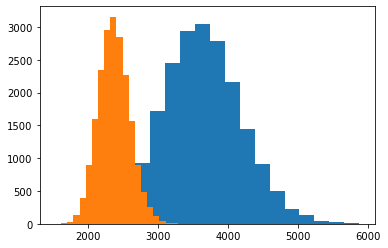

In [10]:
days = bike_data['started_at']


prelockdown = days[(days > '2020-01-01') & (days < '2020-03-23')]
prelockdown = (prelockdown.groupby(prelockdown.dt.week).count())
duringlockdown = days[(days > '2020-03-01') & (days < '2020-06-01')]
duringlockdown = (duringlockdown.groupby(duringlockdown.dt.week).count())
prelockdown2019 = days[(days > '2019-01-01') & (days < '2019-03-23')]
prelockdown2019 = (prelockdown2019.groupby(prelockdown2019.dt.week).count())
duringlockdown2019 = days[(days > '2019-03-01') & (days < '2019-06-01')]
duringlockdown2019 = (duringlockdown2019.groupby(duringlockdown2019.dt.week).count())

actuallockdown = prelockdown/prelockdown2019
actualpre = duringlockdown/duringlockdown2019


#bootstrap with 20000 repitions rides per day
k = 20000
n = len(duringlockdown)
x = np.zeros(k)
for i in range(k):
    x_star = duringlockdown.sample(n,replace = True)
    x[i] = x_star.mean()
    
plt.hist(x,20)
print("Confidence Interval")
print(pd.Series(x).quantile([0.025, 0.975]))


y = len(prelockdown)
for i in range(k):
    x_star = prelockdown.sample(y,replace = True)
    x[i] = x_star.mean()
    
plt.hist(x,20)
print("Confidence Interval")
print(pd.Series(x).quantile([0.025, 0.975]))

Confidence Interval
0.025    1.281447
0.975    3.773306
dtype: float64


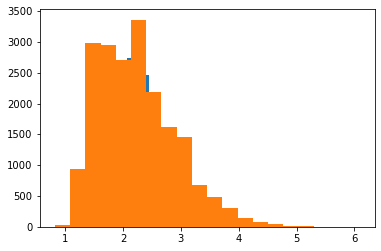

In [11]:
k = 20000
n = len(actuallockdown)
x = np.zeros(k)
for i in range(k):
    x_star = actuallockdown.sample(n,replace = True)
    x[i] = x_star.mean()
    
plt.hist(x,20)

for i in range(k):
    x_star = actualpre.sample(n,replace = True)
    x[i] = x_star.mean()
    
plt.hist(x,20)
print("Confidence Interval")
print(pd.Series(x).quantile([0.025, 0.975]))

#this graph is standarized over the 2019 data to get rid of the weather factor, and the increase in popularity of the system
#this assumes that the increase in popularity is linear, which ofcourse is not, but this is as close as we can get to comparing
#the lone effect of lockdown

In [12]:
weather_2019 = pd.read_csv("Datasets/weather2019.csv")
weather_2019['date'] = pd.to_datetime(weather_2019['date'])

In [13]:
#Correlation between weather and usage in 2019 - setup

rides_2019 = bike_data['started_at']
rides_2019 = rides_2019[(rides_2019 >= '2019-01-01') & (rides_2019 < '2020-01-01')]
rides_2019 = (rides_2019.groupby(rides_2019.dt.week).count()).reset_index(name='rides_taken')
rides_2019 = rides_2019.rename(columns={'started_at' : 'date'})

temp_2019 = weather_2019[['date','tavg','prcp','wspd','pres']]
temp_2019 = temp_2019[(temp_2019.date >= '2019-01-01') & (temp_2019.date < '2020-01-01')]
temp_2019 = (temp_2019.groupby(temp_2019.date.dt.week).mean()).reset_index()

merged_2019 = pd.merge(rides_2019,temp_2019, how='outer', on='date') 
merged_2019.insert(loc = len(merged_2019.columns), column = 'log_rides_taken', value = merged_2019['rides_taken'].apply(np.log10))
merged_2019 = merged_2019.set_index('date')

In [14]:
model1 = smf.ols('rides_taken ~ tavg', data=merged_2019)
results1 = model1.fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rides_taken   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     39.06
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           8.94e-08
Time:                        06:31:24   Log-Likelihood:                -415.08
No. Observations:                  52   AIC:                             834.2
Df Residuals:                      50   BIC:                             838.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    907.6118    239.558      3.789      0.000     426.446    1388.778
tavg         145.6122     23.298      6.250      0.000      98.816     192.408
==============================================================================
Omnibus:                       22.871   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.960
Skew:                           1.387   Prob(JB):                     3.47e-09
Kurtosis:                       6.207   Cond. No.                         24.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#model2 = smf.ols('log_rides_taken ~ tavg', data=merged_2019)
#results2 = model2.fit()

In [16]:
#bootstrapping linear regression
def beta0hat(df):
    model2 = smf.ols('rides_taken ~ tavg', data=df)
    results2 = model2.fit()
    return (results2.params['Intercept'])

def beta1hat(df):
    model2 = smf.ols('rides_taken ~ tavg', data=df)
    results2 = model2.fit()
    return (results2.params['tavg'] )

print(beta0hat(merged_2019))
print(beta1hat(merged_2019))

907.6117739638149
145.61220639811478


In [17]:
def bootstrap_df(df, k=1000, estimator=beta0hat, quantiles=[0.1, 0.9], plot=False):
    n = len(df)
    x_star_est = np.zeros(k)
    for i in range(k):
        x_star = df.sample(n, replace=True)
        x_star_est[i] = estimator(x_star)
        
    if (plot):
        plt.hist(x_star_est, 20)
    return(np.quantile(x_star_est, quantiles), np.std(x_star_est))

#from labs

(array([ 647.56755334, 1196.26045267]), 216.52375693432236)
(array([119.88174098, 173.19644929]), 21.245023307473588)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            rides_taken   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.427
Method:                 Least Squares   F-statistic:                     39.06
Date:                Mon, 05 Apr 2021   Prob (F-statistic):           8.94e-08
Time:                        06:31:33   Log-Likelihood:                -415.08
No. Observations:                  52   AIC:                             834.2
Df Residuals:                      50   BIC:                             838.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    907.6118    239.558      3.789      0.000     426.446    1388.778
tavg         145.6122     23.298      6.250      0.000      98.816     192.408
==============================================================================
Omnibus:                       22.871   Durbin-Watson:                   0.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.960
Skew:                           1.387   Prob(JB):                     3.47e-09
Kurtosis:                       6.207   Cond. No.                         24.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

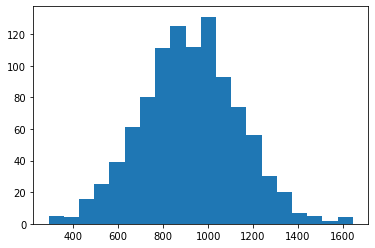

In [18]:
beta0_est = bootstrap_df(merged_2019, estimator=beta0hat, plot = True)
beta1_est = bootstrap_df(merged_2019, estimator=beta1hat)
model2 = smf.ols('rides_taken ~ tavg', data=merged_2019)
results2 = model2.fit()

print(beta0_est)

print(beta1_est)
results2.summary()